# Visualizacion de una variable

La librería **Pandas** es una de las fundamentales en el ecosistema de python para análisis de datos. 
Inicialmente está pensada para cargar los datos en una estructura tabular y manejarlos con facilidad.  
Sin embargo, también incluye muchas características que permiten la visualización rápida de los datos cargados. Estas opciones facilitan mucho la visualización exploratoria de los datos.  
A continuación podemos ver ejemplos del funcionamiento al visualizar sólo 1 de las variables que consituyen el conjunto de datos.

In [1]:
import pandas as pd

En primer lugar, cargamos los datos.
El conjunto de datos de ejemplo consiste en la crítica de vinos incluida en una revista especializada. 
Por cada uno de los tipos de vino se incluye información del vino (incluyendo país, precio, bodega...), junto con información otorgada por la revista (como una puntuación de 0 a 100).

In [ ]:
#Se emplea el código de esta celda solo si se está ejecutando el código en Google Collaboratory (se emplea para obtener los datos)
#En caso de estar ejecutando el código en un equipo local, no es necesario volver a descargar los datos

#  ! git clone https://github.com/bbaruque/VisDat_Ejemplos.git
#  data_dir = "./VisDat_Ejemplos/JupyterNotebooks/data/"  

In [2]:
# En caso de haber ejecutado la celda anterior, esta debe dejarse SIN EJECUTAR
data_dir = "../../data/datos_1ªy2ªParte/"

In [3]:
reviews = pd.read_csv(data_dir+"winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Datos Categóricos

Los datos categóricos son aquellos datos no numéricos en nuestro conjunto. Representan categorías en los datos y en general, hay un número finito de opciones a colocar en cada entrada.

- En los datos de ejemplo, las **categorías** son **nominales**: categorías "puras" que no tienen ningún orden entre sí. Ejemplos de este tipo son: paises, códigos postales, tipos de vino, etc.

- El otro tipo de **categorías** serían las **ordinales**: son aquellas que tiene sentido comparar entre sí. Aunque son categorías, se representan con un número que tiene significado como magnitud. Por ejemplo: magnitudes de terremotos, pisos con un determinado número de habitaciones en un área, número de miembros de una familia, etc.

## Gráficos de Barra

Probablemente los más sencillos. Permiten agrupar categorías en números (frecuencia de cada una) y comparar el número de apariciones de cada una.

In [3]:
# De la tabla de reviews, se extrae la columna 'provincie'
# Se cuenta el numero de veces que aparece cada una
# Se obtienen las 10 primeras
# se genera el gráfico de barras

reviews['province'].value_counts().head(10).plot.bar()

Se puede comprobar que California produce 4 veces más variedades de vino que la inmediatamente posterior: Washington

Con una pequeña modificación (dividiendo por el numero de elementos de la columna), se puede comprobar cual es esta misma cantidad en porcentaje

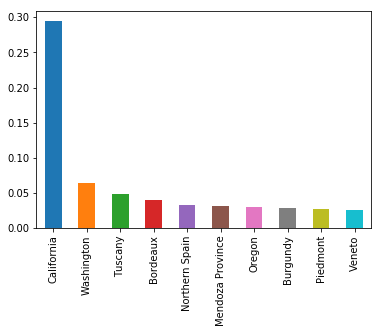

In [4]:
(reviews['province'].value_counts().head(10)/len(reviews)).plot.bar()

California produce un 30% de las variedades de vino en el mercado

Estoas gráficos son muy flexibles: la altura puede representar cualquier valor numérico. Cada barra puede representar cualquier valor categórico.

Podemos comprobar esto creando un gráfico para comprobar el numero de vinos que han recibido una determinada puntuación de calidad:

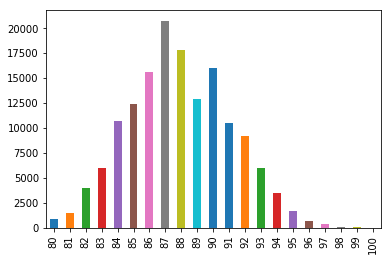

In [5]:
# De la tabla de reviews, se extrae la columna 'points'
# Se cuenta el numero de veces que aparece cada puntuacion
# Se ordenan por puntuacion (columna)
# se genera el gráfico de barras

reviews['points'].value_counts().sort_index().plot.bar()

Se puede comprobar que la valoración más otrogada es la de 87, así como que no existen apenas vinos con puntuaciones más altas de 98.

## Gráficos de Línea

En el caso de que se tengan demasiadas categorías como para poder representar una por barra (imaginemos que tuviaramos 100), se puede emplear este típo de gráficos.

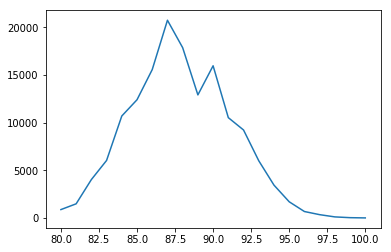

In [6]:
# De la tabla de reviews, se extrae la columna 'points'
# Se cuenta el numero de veces que aparece cada puntuacion
# Se ordenan por puntuacion (columna)
# se genera el gráfico de linea

reviews['points'].value_counts().sort_index().plot.line()

El gráfico de linea puede representar cualquier número de categorías, siendo muy útil en distriubciones de variables con muchos valores diferentes.

Sin embargo, no son apropiados para datos categóricos nominales. No permite distinguir cada categoría por separado y da la impresión de que todas son iguales. Además se incluye en la representación una especie de "orden implícito" en el eje horizontal que no tiene sentido en las categorías. Por ejemplo, si se representan provincias, una linea descendente de "California" a "Washington" no tiene un significado claro.

Como consejo general, en caso de poder emplear un gráfico de barras, es más claro éste.

## Gráficos de Área

Son exactamente iguales a los de línea, con el fondo relleno. 

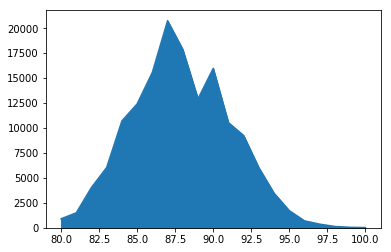

In [7]:
# De la tabla de reviews, se extrae la columna 'points'
# Se cuenta el numero de veces que aparece cada puntuacion
# Se ordenan por puntuacion (columna)
# se genera el gráfico de area

reviews['points'].value_counts().sort_index().plot.area()

## Datos de Intervalo


Ejemplos de variables en intervalo son la velocidad del viento, la temperatura del sol o la velocidad de un vehiculo.

Se pueden considerar diferentes a una variable categórica porque implícitamente tienen un orden específico y tienen un significado interno. Esto significa que se puede cuantificar la diferencia entre 2 valores en la misma variable.

Por ejemplo, una muestra puede tener -20ºC y otra 120ºC: la diferencia entre ambas son 140ºC de temperatura, sobre los que se podrían calcular una cierta cantidad de Julios de Energía...

Una variable que puede tener potencialmente infinitos valores, será claramente de intervalo. Casi con seguridad, se tratará de un número (podemos medir -20ºC o 20.0001ºC o -20.0000001ºC)

En estos casos se recomienda siempre el uso de gráficos de linea. Por el contrario, es complejo emplear gráficos de barras en estos casos.

## Histogramas

Vamos a probar una nuevo tipo de gráfico en este tipo de datos:

El histograma es un gráfico de barras especial.  
Divide el intervalo de datos que se le pasa en sub-intervalos de igual tamaño y cuenta cuantas muestras tienen su valor en cada intervalo.  
La diferencia es que cada barra, en lugar de representar un valor para los datos, representa un intervalo de valores.

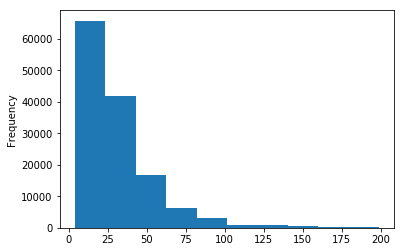

In [8]:
# De la tabla 'reviews'
# Se seleccionan solo las entradas cuya columna 'price' es menor que 200
# Se selecciona de éstas la columna 'price'
# Se realiza un histograma

reviews[reviews['price'] < 200]['price'].plot.hist()

Se puede observar que hay algo más de 60.000 variedades de vino cuyo precio es menor de 25$, mientras que hay algunas más de 40.000 cuyo precio está entre 25 y 50. Muy pocas tienen un precio entre 175 y 200€.

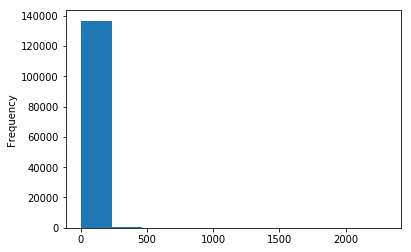

In [9]:
reviews['price'].plot.hist()

Es interesante destacar que hay un numero muy pequeño de vinos cuyo precio pasa de 200€ llega hasta los 2000€ y hace que el gráfico con todos los dato se tenga que adaptar, perdiendo detalle en todas las demás variedades.  
La opción más sencilla para evitar esto es la que hemos empleado: recortar los datos que puedan resultar menos relevantes en nuestra visualización y simplemente no mostrarlos.

In [10]:
print("Variedades de vino de más de 1500: {}".format(len(reviews[reviews['price'] > 1500])))

Variedades de vino de más de 1500: 3


La variable 'points' que también es una variable numérica se adapta muy bien al tipo de datos de histograma

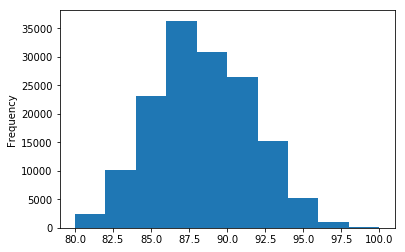

In [11]:
reviews['points'].plot.hist()